In [49]:

## Import Python libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import(FunctionTransformer,StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from scipy.special import factorial
from scipy.optimize import minimize


In [50]:
data = pd.read_csv(r'C:\Users\ajibo\Desktop\DATA SCIENCE PROJECTS\DS-LungCancer\LungCancerData.csv')

data.head()

,ZCTA5,Zip_name,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,...,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,case_n_18plus
0,20105,ZCTA5 20105,13996,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,...,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,7.801598,1.0,15.0
1,20106,ZCTA5 20106,4091,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,...,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,7.171176,18.0,21.0
2,20109,ZCTA5 20109,29499,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,...,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,7.940322,72.0,68.0
3,20110,ZCTA5 20110,36041,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,...,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,8.013779,50.0,102.0
4,20111,ZCTA5 20111,26293,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,...,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,8.080360,56.0,66.0


In [51]:
data.shape

(896, 34)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZCTA5                            896 non-null    int64  
 1   Zip_name                         896 non-null    object 
 2   Population_18andOver             896 non-null    int64  
 3   Pct_Civilian_Unemployed          881 non-null    float64
 4   Pct_BelowPoverty_18andOver       880 non-null    float64
 5   Pct_Population_Male_18andOver    891 non-null    float64
 6   Pct_Population_65andOver         891 non-null    float64
 7   Pct_Population_Male_65andOver    891 non-null    float64
 8   Pct_Population_Female_65andOver  891 non-null    float64
 9   Pct_Black_18andOver              891 non-null    float64
 10  Pct_Black_Male_18andOver         891 non-null    float64
 11  Pct_Black_Female_18andOver       891 non-null    float64
 12  Pct_Black_65andOver   

In [53]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 895
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZCTA5                            788 non-null    int64  
 1   Zip_name                         788 non-null    object 
 2   Population_18andOver             788 non-null    int64  
 3   Pct_Civilian_Unemployed          788 non-null    float64
 4   Pct_BelowPoverty_18andOver       788 non-null    float64
 5   Pct_Population_Male_18andOver    788 non-null    float64
 6   Pct_Population_65andOver         788 non-null    float64
 7   Pct_Population_Male_65andOver    788 non-null    float64
 8   Pct_Population_Female_65andOver  788 non-null    float64
 9   Pct_Black_18andOver              788 non-null    float64
 10  Pct_Black_Male_18andOver         788 non-null    float64
 11  Pct_Black_Female_18andOver       788 non-null    float64
 12  Pct_Black_65andOver        

In [54]:
data.columns

Index(['ZCTA5', 'Zip_name', 'Population_18andOver', 'Pct_Civilian_Unemployed',
       'Pct_BelowPoverty_18andOver', 'Pct_Population_Male_18andOver',
       'Pct_Population_65andOver', 'Pct_Population_Male_65andOver',
       'Pct_Population_Female_65andOver', 'Pct_Black_18andOver',
       'Pct_Black_Male_18andOver', 'Pct_Black_Female_18andOver',
       'Pct_Black_65andOver', 'Pct_Black_Male_65andOver',
       'Pct_Black_Female_65andOver', 'Pct_White_18andOver',
       'Pct_White_Male_18andOver', 'Pct_White_Female_18andOver',
       'Pct_White_65andOver', 'Pct_White_Male_65andOver',
       'Pct_White_Female_65andOver', 'Pct_Hisp_18andOver',
       'Pct_Hisp_Male_18andOver', 'Pct_Hisp_Female_18andOver',
       'Pct_Hisp_65andOver', 'Pct_Hisp_Male_65andOver',
       'Pct_Hisp_Female_65andOver', 'BINGE_CrudePrev', 'CSMOKING_CrudePrev',
       'OBESITY_CrudePrev', 'Median_Household_Income', 'ZCTA_pm2_5',
       'sdi_score', 'case_n_18plus'],
      dtype='object')

In [57]:
selected_column = ['Population_18andOver', 'Pct_Civilian_Unemployed',
       'Pct_BelowPoverty_18andOver', 'Pct_Population_Male_18andOver',
       'Pct_Population_65andOver', 'Pct_Population_Male_65andOver',
       'Pct_Population_Female_65andOver', 'Pct_Black_18andOver',
       'Pct_Black_Male_18andOver', 'Pct_Black_Female_18andOver',
       'Pct_Black_65andOver', 'Pct_Black_Male_65andOver',
       'Pct_Black_Female_65andOver', 'Pct_White_18andOver',
       'Pct_White_Male_18andOver', 'Pct_White_Female_18andOver',
       'Pct_White_65andOver', 'Pct_White_Male_65andOver',
       'Pct_White_Female_65andOver', 'Pct_Hisp_18andOver',
       'Pct_Hisp_Male_18andOver', 'Pct_Hisp_Female_18andOver',
       'Pct_Hisp_65andOver', 'Pct_Hisp_Male_65andOver',
       'Pct_Hisp_Female_65andOver', 'BINGE_CrudePrev', 'CSMOKING_CrudePrev',
       'OBESITY_CrudePrev', 'Median_Household_Income', 'ZCTA_pm2_5',
       'sdi_score', 'case_n_18plus']

In [58]:
independent_vars = data[['Population_18andOver', 'Pct_Civilian_Unemployed',
       'Pct_BelowPoverty_18andOver', 'Pct_Population_Male_18andOver',
       'Pct_Population_65andOver', 'Pct_Black_18andOver',
       'Pct_Black_Male_18andOver', 'Pct_Black_Female_18andOver',
       'Pct_Black_65andOver', 'Pct_White_18andOver',
       'Pct_White_Male_18andOver', 'Pct_White_Female_18andOver',
       'Pct_White_65andOver', 'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver', 'BINGE_CrudePrev',
       'CSMOKING_CrudePrev', 'OBESITY_CrudePrev', 'Median_Household_Income',
       'ZCTA_pm2_5','Pct_Population_Male_65andOver',
    'Pct_Population_Female_65andOver',
    'Pct_Black_Male_65andOver',
    'Pct_Black_Female_65andOver',
    'Pct_White_Male_65andOver',
    'Pct_White_Female_65andOver',
    'Pct_Hisp_Male_65andOver',
    'Pct_Hisp_Female_65andOver',]]

In [59]:
target = 'case_n_18plus'

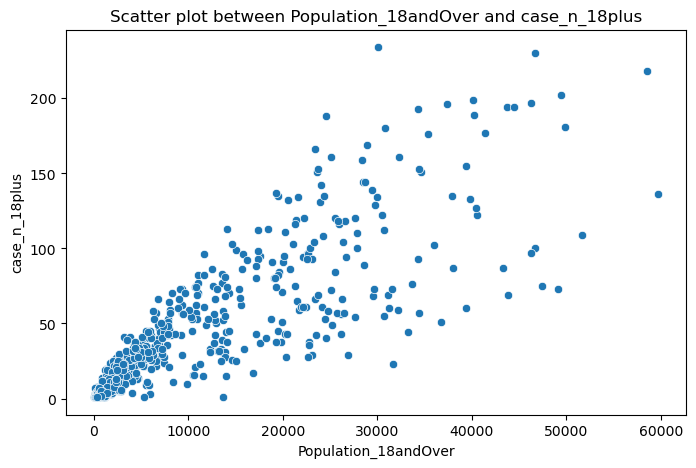

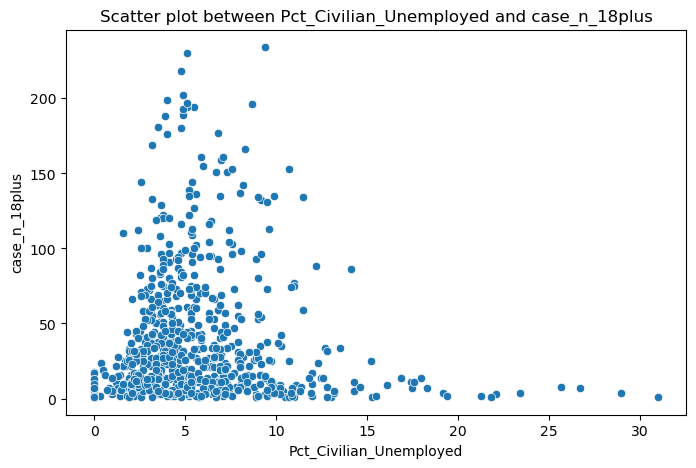

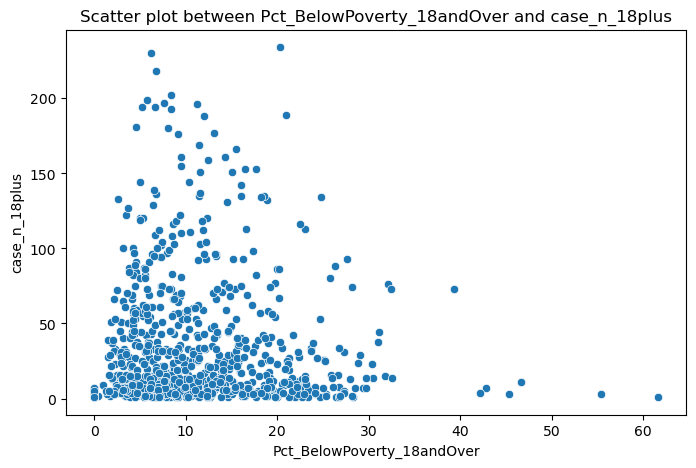

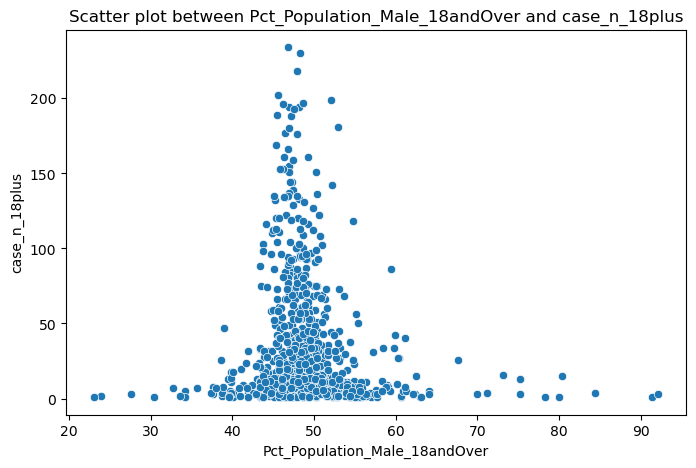

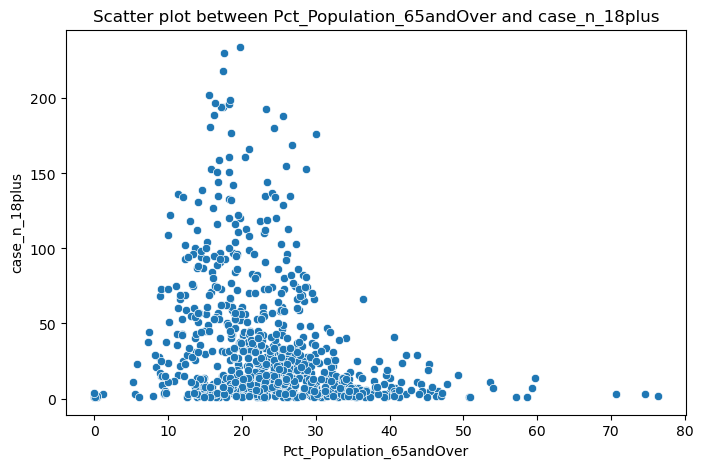

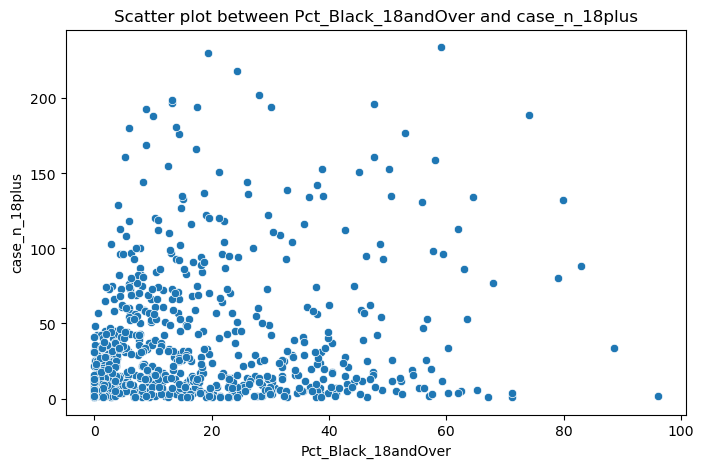

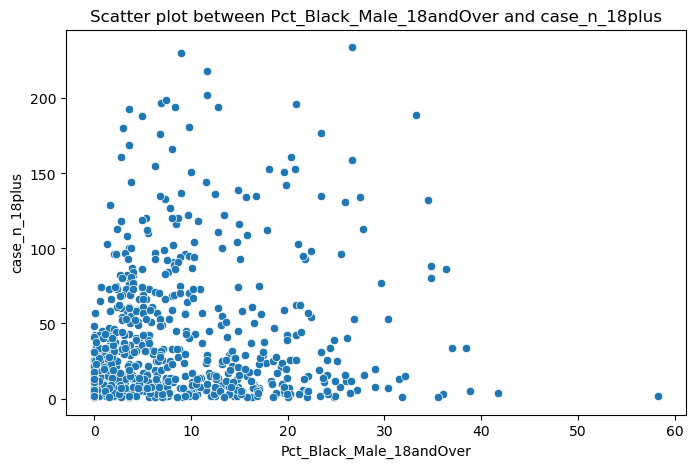

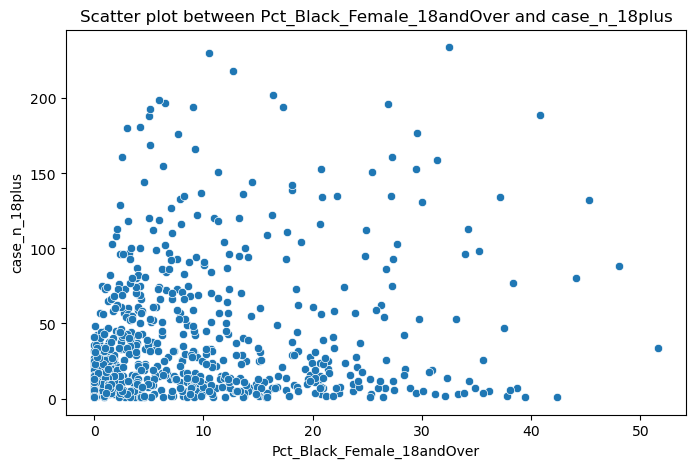

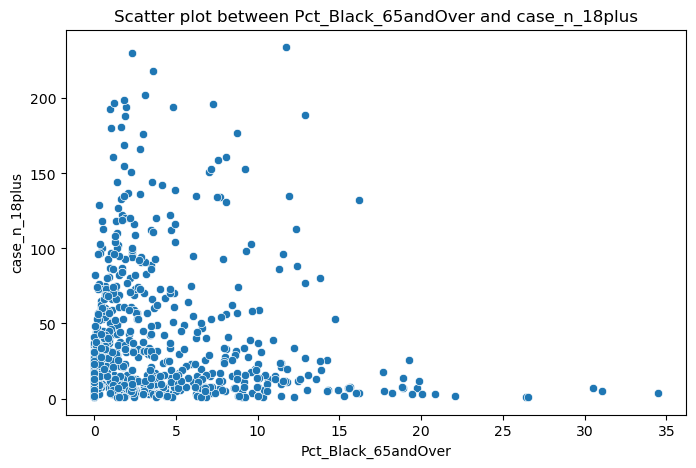

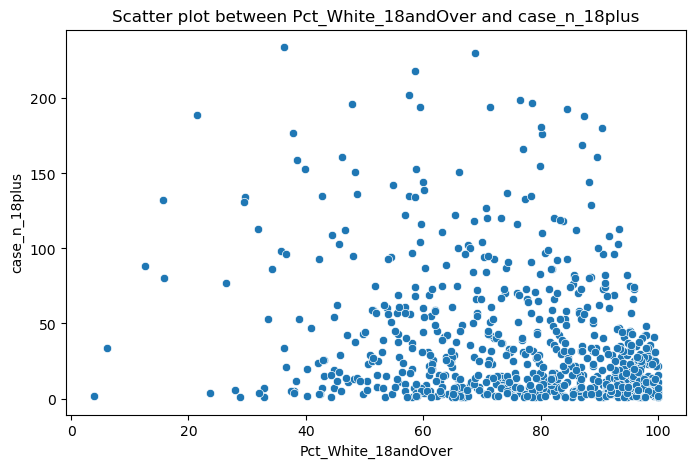

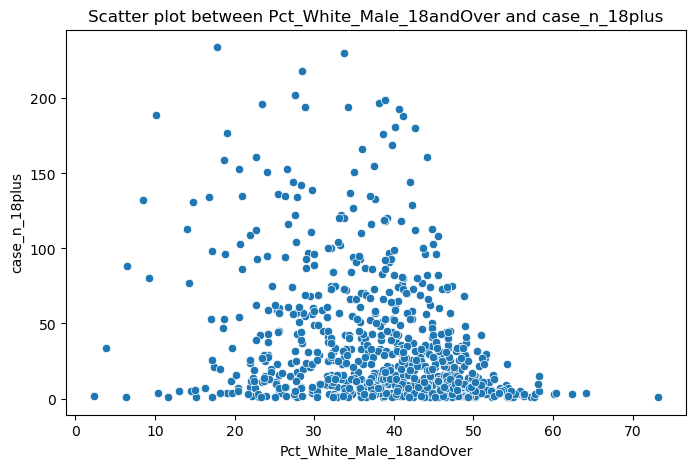

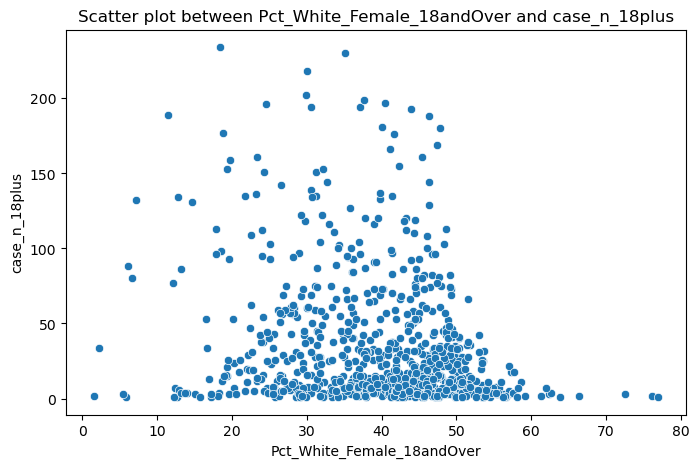

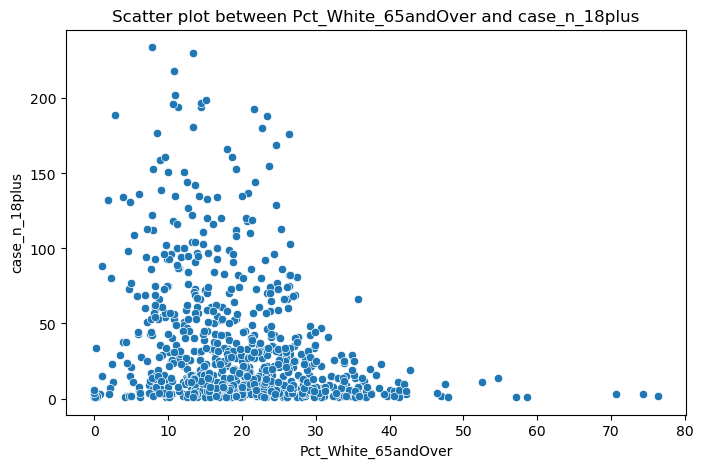

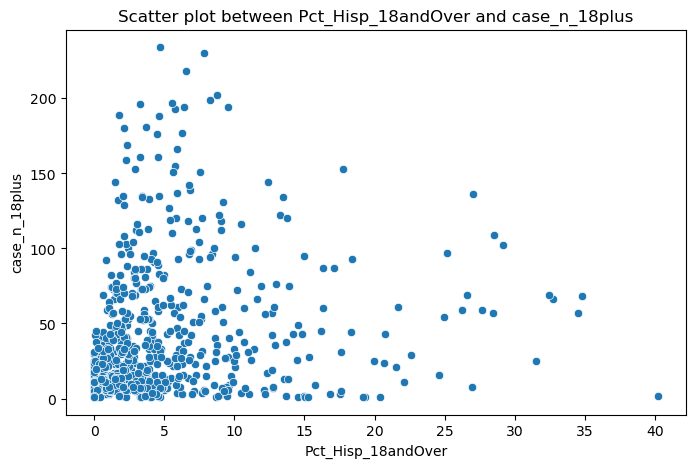

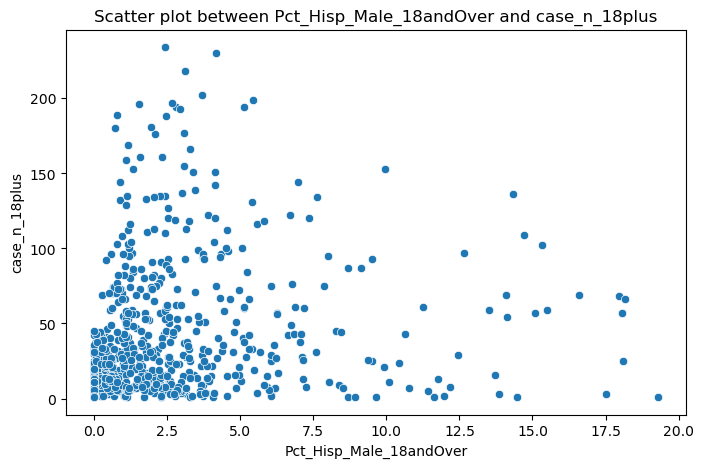

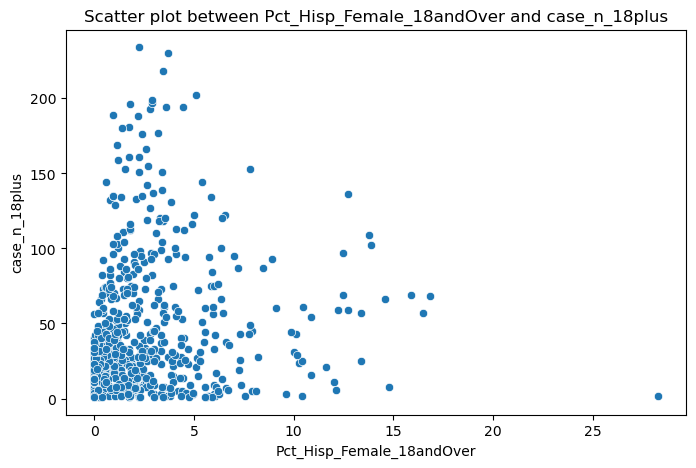

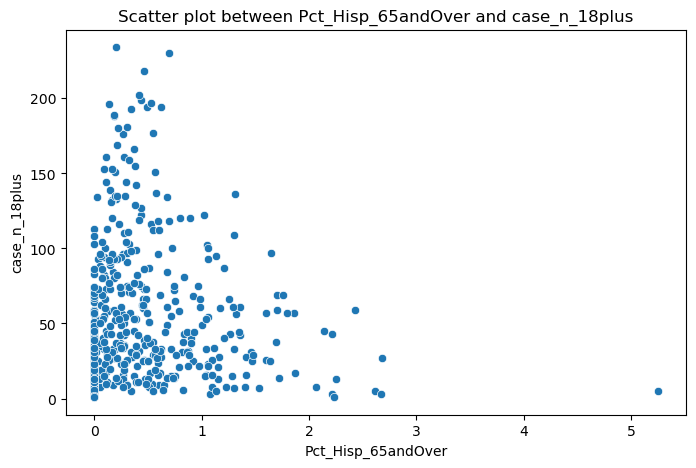

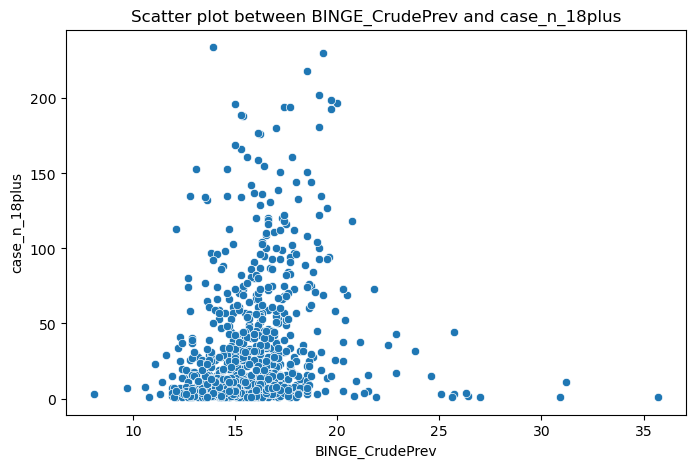

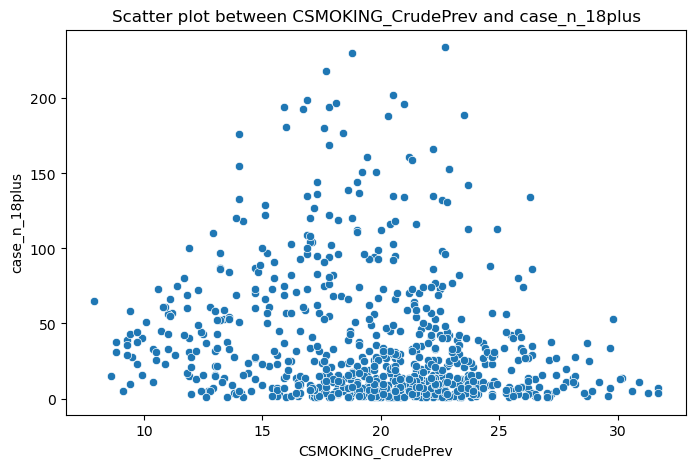

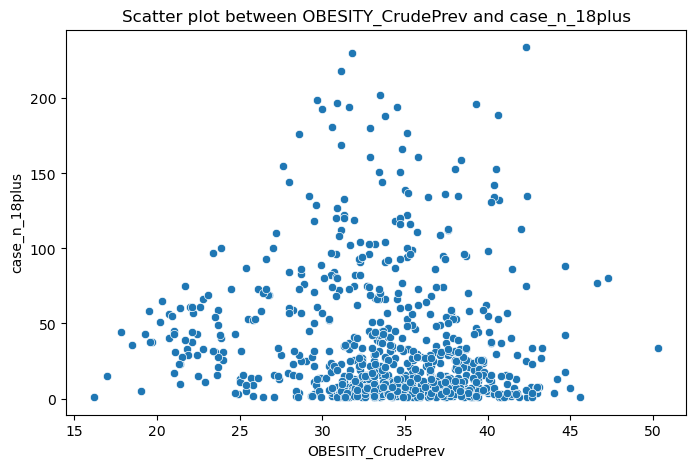

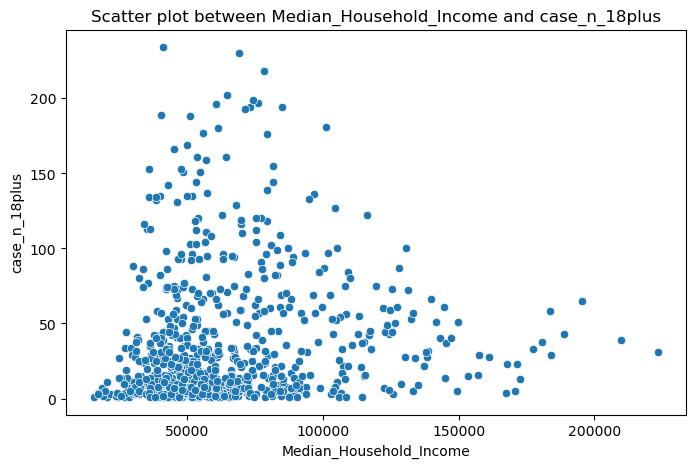

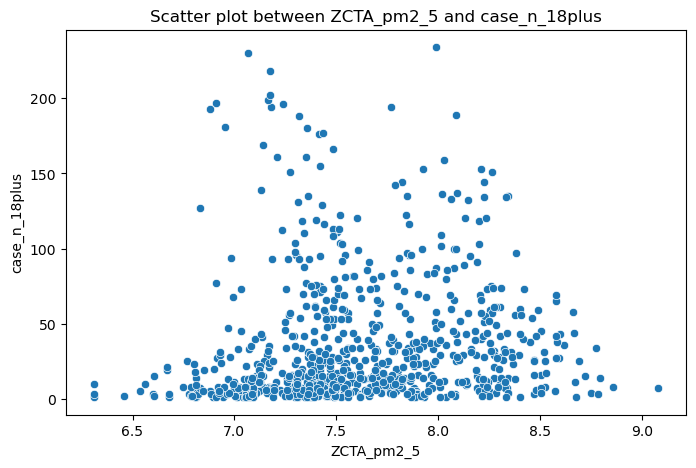

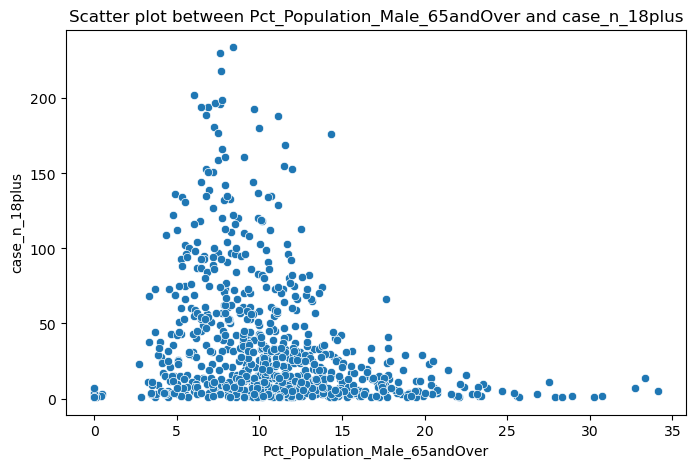

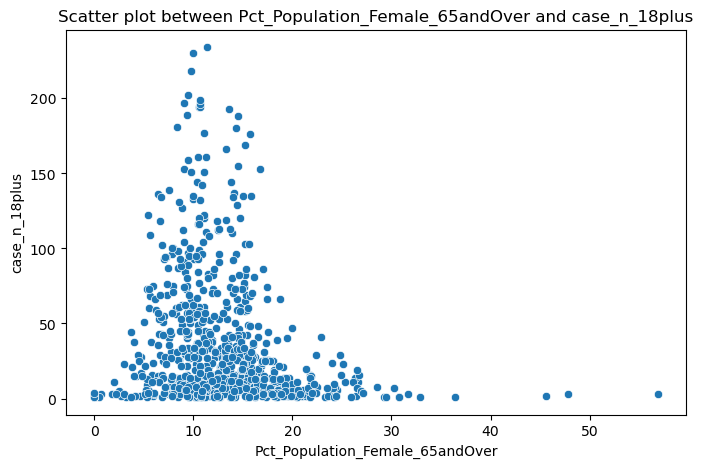

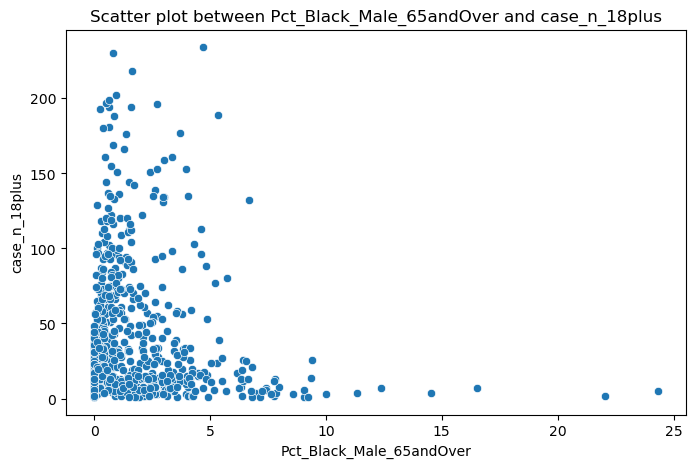

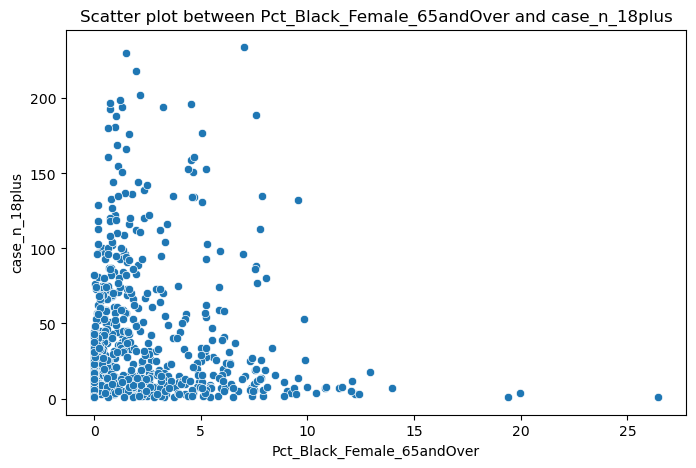

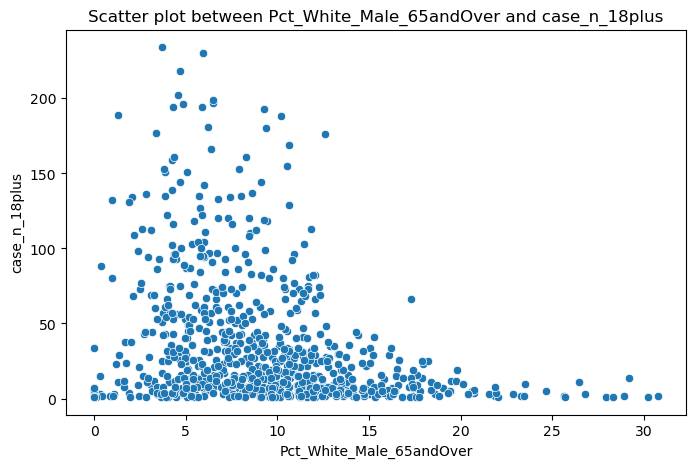

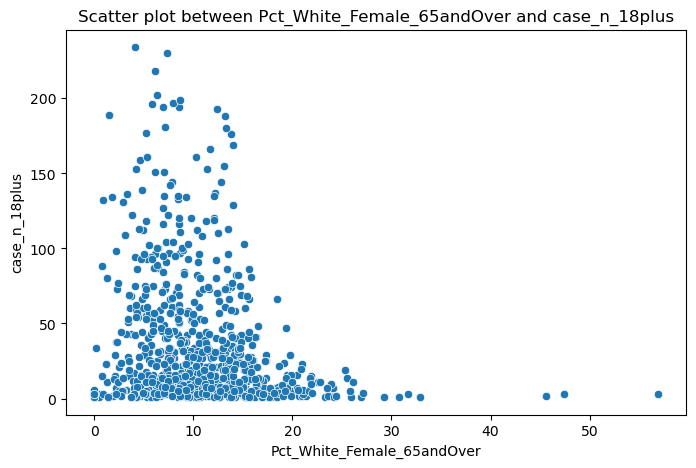

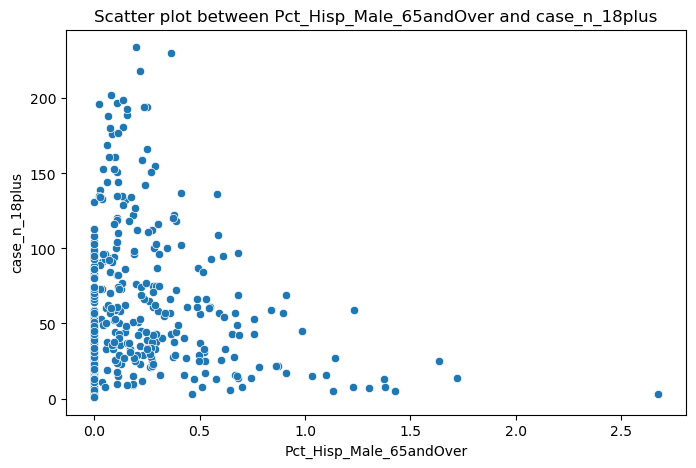

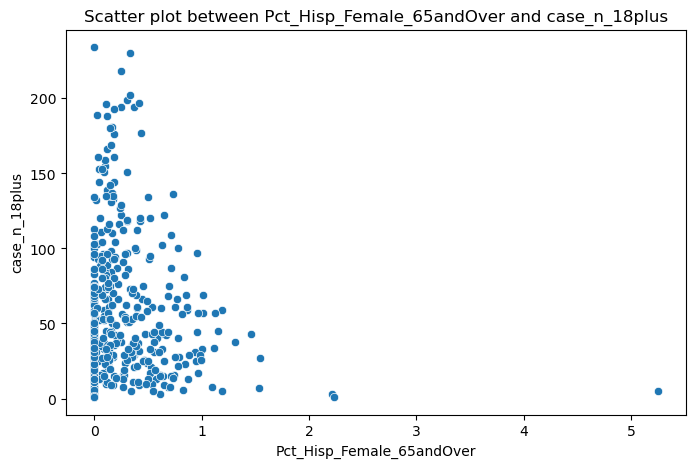

In [60]:
for var in independent_vars:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=data[var], y = data[target])
    plt.title(f'Scatter plot between {var} and {target}')
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()

In [61]:
independent_vars.corr()

,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,Pct_Black_65andOver,Pct_White_18andOver,...,Median_Household_Income,ZCTA_pm2_5,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver
Population_18andOver,1.000000,0.014309,-0.113577,-0.062461,-0.410796,0.123423,0.102302,0.132203,-0.086923,-0.335931,...,0.355878,0.265495,-0.390547,-0.341294,-0.094440,-0.066293,-0.375527,-0.339417,0.298521,0.322856
Pct_Civilian_Unemployed,0.014309,1.000000,0.284317,-0.007922,-0.077711,0.162913,0.156366,0.155727,0.108836,-0.124007,...,-0.251756,0.117333,-0.092958,-0.047935,0.077249,0.116550,-0.123681,-0.105454,-0.057263,-0.033125
Pct_BelowPoverty_18andOver,-0.113577,0.284317,1.000000,0.059129,-0.004378,0.163803,0.162618,0.151827,0.120090,-0.071408,...,-0.600622,0.074323,-0.035400,0.023592,0.083040,0.130400,-0.056780,-0.016727,-0.156583,-0.142878
Pct_Population_Male_18andOver,-0.062461,-0.007922,0.059129,1.000000,-0.223480,-0.018244,0.175932,-0.187700,-0.097574,-0.021819,...,-0.011925,-0.020952,-0.011917,-0.360478,-0.018311,-0.146175,-0.006092,-0.273813,-0.021756,-0.014882
Pct_Population_65andOver,-0.410796,-0.077711,-0.004378,-0.223480,1.000000,-0.112705,-0.135682,-0.083524,0.191439,0.286042,...,-0.293114,-0.262281,0.868894,0.902128,0.166588,0.179882,0.795820,0.801166,-0.151515,-0.123805
Pct_Black_18andOver,0.123423,0.162913,0.163803,-0.018244,-0.112705,1.000000,0.951843,0.962904,0.798901,-0.914274,...,-0.203876,0.042459,-0.113260,-0.088311,0.701649,0.745395,-0.449692,-0.448316,-0.032335,-0.044454
Pct_Black_Male_18andOver,0.102302,0.156366,0.162618,0.175932,-0.135682,0.951843,1.000000,0.833802,0.730725,-0.873426,...,-0.199528,0.038886,-0.102553,-0.135774,0.690816,0.641656,-0.431920,-0.441911,-0.030975,-0.033824
Pct_Black_Female_18andOver,0.132203,0.155727,0.151827,-0.187700,-0.083524,0.962904,0.833802,1.000000,0.795408,-0.877558,...,-0.191498,0.042230,-0.113681,-0.039518,0.655415,0.777455,-0.429592,-0.418321,-0.030963,-0.050277
Pct_Black_65andOver,-0.086923,0.108836,0.120090,-0.097574,0.191439,0.798901,0.730725,0.795408,1.000000,-0.677418,...,-0.214677,-0.008193,0.174959,0.165189,0.887003,0.925878,-0.244070,-0.285636,-0.091130,-0.092335
Pct_White_18andOver,-0.335931,-0.124007,-0.071408,-0.021819,0.286042,-0.914274,-0.873426,-0.877558,-0.677418,1.000000,...,-0.037154,-0.183719,0.268015,0.241072,-0.588725,-0.637145,0.575327,0.571239,-0.110533,-0.112926


<Axes: >

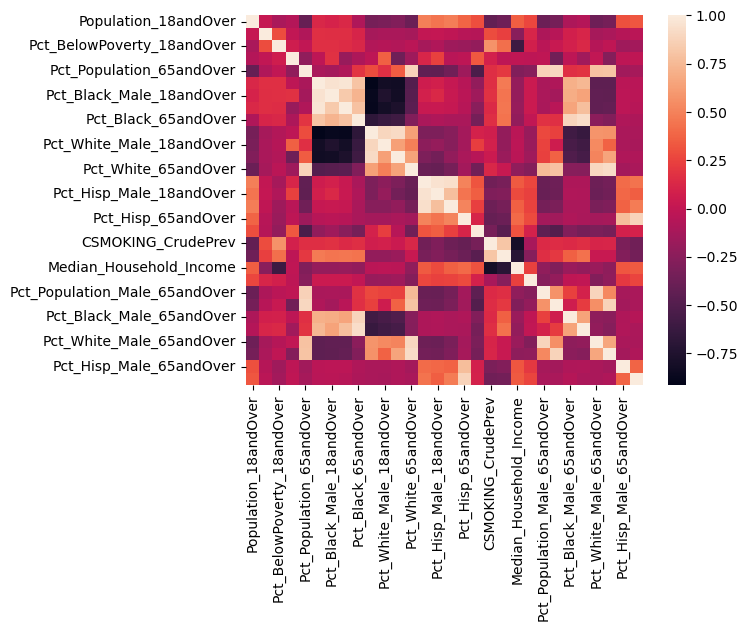

In [62]:
sns.heatmap(independent_vars.corr())

(array([450., 145.,  69.,  46.,  28.,  21.,  11.,   6.,   9.,   3.]),
 array([  1. ,  24.3,  47.6,  70.9,  94.2, 117.5, 140.8, 164.1, 187.4,
        210.7, 234. ]),
 <BarContainer object of 10 artists>)

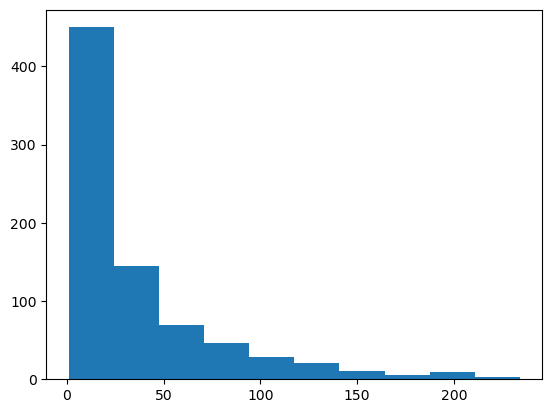

In [63]:
plt.hist(data['case_n_18plus'])

In [64]:
data['case_n_18plus'].mean()

34.80329949238579

In [65]:
data['case_n_18plus'].var()

1782.8494427208634

In [68]:
# Since mean and variance are different, there is overdispersion in the data


In [69]:
data['case_n_18plus'].min()

1.0

In [70]:
data['case_n_18plus'].max()

234.0


# Available features 

1. Demographics: Gender (F, M), Race (Black, White, Other), Ethnicity (Hispanic or Latino;  Not Hispanic or Latino), Age (>= 65) 


1.1. In particular: Percentage of males, Percentage of Blacks, Percentage of  Whites, Percentage of Hispanics


The impact of race, specifically Black or White, on the prevalence of Lung cancer was measured against the  category ‘Other’, which includes Asian, Native Hawaiians and Other Pacific Islanders (NHPI), American Indian and Alaska Natives, some other race alone, and two or more races



1.2. The effect of age will be incorporated into the model through the variable: percentage of population with age ≥ 65


2. Prevalence of Binge Drinking, Smoking, and Obesity


3. Percent Population below Poverty


4. Social Deprivation Index (SDI)


It quantify the socioeconomic variation in health outcomes

It is a deprivation based on seven demographic characteristics 


The seven demographic characteristics:  


4.1. Percent living in poverty,  

4.2. Percent with less than 12 years of education

4.3. Percent single-parent households

4.4. Percent living in rented housing units

4.5. Percent living in overcrowded housing units

4.6. Percent of households without a car  and 

4.7. Percent unemployed adults under 65 years of age


Its value range from 1 to 100, with higher values reflecting greater deprivation



5. Average Daily Air Quality PM2.5 Concentration: Particulate Matter with a diameter of 2.5 micrometers or less



In [71]:
data.columns

Index(['ZCTA5', 'Zip_name', 'Population_18andOver', 'Pct_Civilian_Unemployed',
       'Pct_BelowPoverty_18andOver', 'Pct_Population_Male_18andOver',
       'Pct_Population_65andOver', 'Pct_Population_Male_65andOver',
       'Pct_Population_Female_65andOver', 'Pct_Black_18andOver',
       'Pct_Black_Male_18andOver', 'Pct_Black_Female_18andOver',
       'Pct_Black_65andOver', 'Pct_Black_Male_65andOver',
       'Pct_Black_Female_65andOver', 'Pct_White_18andOver',
       'Pct_White_Male_18andOver', 'Pct_White_Female_18andOver',
       'Pct_White_65andOver', 'Pct_White_Male_65andOver',
       'Pct_White_Female_65andOver', 'Pct_Hisp_18andOver',
       'Pct_Hisp_Male_18andOver', 'Pct_Hisp_Female_18andOver',
       'Pct_Hisp_65andOver', 'Pct_Hisp_Male_65andOver',
       'Pct_Hisp_Female_65andOver', 'BINGE_CrudePrev', 'CSMOKING_CrudePrev',
       'OBESITY_CrudePrev', 'Median_Household_Income', 'ZCTA_pm2_5',
       'sdi_score', 'case_n_18plus'],
      dtype='object')

In [72]:
num_columns = data.shape[1]

print("Number of columns:", num_columns)

Number of columns: 34


In [73]:
X = data.drop(columns= ['case_n_18plus','ZCTA_pm2_5', 'ZCTA5'])

In [74]:

N = data['case_n_18plus']



## Mathematical Formulation


If we define the number of cases $Y_{i}$ in terms of the population $N_{i}$ with a given intensity $\lambda_{i}$,
we assume that cases $Y_{i}$ arise as a Poisson process with rate $\lambda_{i}$, which represents the expected number of cases per individual in the population $N_{i}$


Let

* $Y_{i}$ be the total number of cases
* $N_{i}$ be the total population
* $\lambda_{i}$ be the intensity rate, defined as the expected number of cases per individual
    
    



We assume that each individual independently experiences a case occurrence with rate $\lambda_{i}$



Then, the total number of cases $Y_{i}$ follows a Poisson distribution:
    
    

\begin{align}
 Y_{i} \sim \text{Poisson}(\lambda_{i} N_{i})
\end{align}

This means that the probability of observing exactly $k$ cases is:

\begin{align}
P(Y_{i} = k) = \frac{(\lambda_{i} N_{i})^k e^{-\lambda_{i} N_{i}}}{k!}
\end{align}

where
* $\lambda_{i} N_{i}$ is the expected number of cases in the population
* $k!$ is the factorial of $k$
    






## Mathematical Formulation


If we define the number of cases $Y_{i}$ in terms of the population $N_{i}$ with a given intensity $\lambda_{i}$,
we assume that cases $Y_{i}$ arise as a Poisson process with rate $\lambda_{i}$, which represents the expected number of cases per individual in the population $N_{i}$


Let

* $Y_{i}$ be the total number of cases
* $N_{i}$ be the total population
* $\lambda_{i}$ be the intensity rate, defined as the expected number of cases per individual
    
    



We assume that each individual independently experiences a case occurrence with rate $\lambda_{i}$



Then, the total number of cases $Y_{i}$ follows a Poisson distribution:
    
    

\begin{align}
 Y_{i} \sim \text{Poisson}(\lambda_{i} N_{i})
\end{align}

This means that the probability of observing exactly $k$ cases is:

\begin{align}
P(Y_{i} = k) = \frac{(\lambda_{i} N_{i})^k e^{-\lambda_{i} N_{i}}}{k!}
\end{align}

where
* $\lambda_{i} N_{i}$ is the expected number of cases in the population
* $k!$ is the factorial of $k$
    






## Mathematical Formulation


If we define the number of cases $Y_{i}$ in terms of the population $N_{i}$ with a given intensity $\lambda_{i}$,
we assume that cases $Y_{i}$ arise as a Poisson process with rate $\lambda_{i}$, which represents the expected number of cases per individual in the population $N_{i}$


Let

* $Y_{i}$ be the total number of cases
* $N_{i}$ be the total population
* $\lambda_{i}$ be the intensity rate, defined as the expected number of cases per individual
    
    



We assume that each individual independently experiences a case occurrence with rate $\lambda_{i}$



Then, the total number of cases $Y_{i}$ follows a Poisson distribution:
    
    

\begin{align}
 Y_{i} \sim \text{Poisson}(\lambda_{i} N_{i})
\end{align}

This means that the probability of observing exactly $k$ cases is:

\begin{align}
P(Y_{i} = k) = \frac{(\lambda_{i} N_{i})^k e^{-\lambda_{i} N_{i}}}{k!}
\end{align}

where
* $\lambda_{i} N_{i}$ is the expected number of cases in the population
* $k!$ is the factorial of $k$
    




In [75]:

X

,Zip_name,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,...,Pct_Hisp_Male_18andOver,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,sdi_score
0,ZCTA5 20105,13996,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,5.244356,...,3.986853,3.958274,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,1.0
1,ZCTA5 20106,4091,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,1.686629,...,0.024444,2.371058,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,18.0
2,ZCTA5 20109,29499,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,7.993491,...,17.959931,16.841249,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,72.0
3,ZCTA5 20110,36041,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,8.135179,...,15.310341,13.861991,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,50.0
4,ZCTA5 20111,26293,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,5.339824,...,18.149317,14.600844,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ZCTA5 24646,710,5.9,26.901408,54.366197,19.154930,11.267606,7.887324,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.3,29.6,35.9,25625.0,60.0
892,ZCTA5 24649,2351,8.4,20.799660,50.999575,13.100808,7.230966,5.869843,0.000000,0.000000,...,0.765632,0.000000,0.000000,0.000000,0.000000,14.7,29.2,36.7,41318.0,52.0
893,ZCTA5 24651,4316,6.7,12.025316,49.606117,26.459685,11.329935,15.129750,4.147359,3.174235,...,0.278035,0.000000,0.000000,0.000000,0.000000,14.7,22.3,38.7,47820.0,54.0
894,ZCTA5 24656,2356,2.9,23.047538,53.098472,29.668930,13.412564,16.256367,0.000000,0.000000,...,0.509338,0.000000,0.000000,0.000000,0.000000,13.8,30.1,36.6,34668.0,45.0


In [76]:
X

,Zip_name,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,...,Pct_Hisp_Male_18andOver,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,sdi_score
0,ZCTA5 20105,13996,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,5.244356,...,3.986853,3.958274,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,1.0
1,ZCTA5 20106,4091,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,1.686629,...,0.024444,2.371058,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,18.0
2,ZCTA5 20109,29499,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,7.993491,...,17.959931,16.841249,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,72.0
3,ZCTA5 20110,36041,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,8.135179,...,15.310341,13.861991,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,50.0
4,ZCTA5 20111,26293,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,5.339824,...,18.149317,14.600844,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ZCTA5 24646,710,5.9,26.901408,54.366197,19.154930,11.267606,7.887324,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.3,29.6,35.9,25625.0,60.0
892,ZCTA5 24649,2351,8.4,20.799660,50.999575,13.100808,7.230966,5.869843,0.000000,0.000000,...,0.765632,0.000000,0.000000,0.000000,0.000000,14.7,29.2,36.7,41318.0,52.0
893,ZCTA5 24651,4316,6.7,12.025316,49.606117,26.459685,11.329935,15.129750,4.147359,3.174235,...,0.278035,0.000000,0.000000,0.000000,0.000000,14.7,22.3,38.7,47820.0,54.0
894,ZCTA5 24656,2356,2.9,23.047538,53.098472,29.668930,13.412564,16.256367,0.000000,0.000000,...,0.509338,0.000000,0.000000,0.000000,0.000000,13.8,30.1,36.6,34668.0,45.0


In [79]:
X = X.drop(columns = 'Zip_name')

In [80]:
X.corr()

,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,...,Pct_Hisp_Male_18andOver,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,sdi_score
Population_18andOver,1.000000,0.014309,-0.113577,-0.062461,-0.410796,-0.390547,-0.341294,0.123423,0.102302,0.132203,...,0.445290,0.478351,0.374636,0.298521,0.322856,0.291165,-0.425614,-0.371665,0.355878,0.064297
Pct_Civilian_Unemployed,0.014309,1.000000,0.284317,-0.007922,-0.077711,-0.092958,-0.047935,0.162913,0.156366,0.155727,...,0.010300,-0.012699,-0.052109,-0.057263,-0.033125,-0.061228,0.288750,0.231296,-0.251756,0.420174
Pct_BelowPoverty_18andOver,-0.113577,0.284317,1.000000,0.059129,-0.004378,-0.035400,0.023592,0.163803,0.162618,0.151827,...,-0.083492,-0.160347,-0.178356,-0.156583,-0.142878,-0.207701,0.568748,0.417567,-0.600622,0.750921
Pct_Population_Male_18andOver,-0.062461,-0.007922,0.059129,1.000000,-0.223480,-0.011917,-0.360478,-0.018244,0.175932,-0.187700,...,0.240479,-0.045185,-0.021373,-0.021756,-0.014882,0.330378,0.086707,-0.020899,-0.011925,0.011337
Pct_Population_65andOver,-0.410796,-0.077711,-0.004378,-0.223480,1.000000,0.868894,0.902128,-0.112705,-0.135682,-0.083524,...,-0.439339,-0.368330,-0.162674,-0.151515,-0.123805,-0.538285,0.159678,0.206237,-0.293114,-0.118890
Pct_Population_Male_65andOver,-0.390547,-0.092958,-0.035400,-0.011917,0.868894,1.000000,0.570277,-0.113260,-0.102553,-0.113681,...,-0.400882,-0.341283,-0.142334,-0.127041,-0.112462,-0.448386,0.132868,0.162476,-0.221699,-0.152033
Pct_Population_Female_65andOver,-0.341294,-0.047935,0.023592,-0.360478,0.902128,0.570277,1.000000,-0.088311,-0.135774,-0.039518,...,-0.379653,-0.313764,-0.145893,-0.140703,-0.107426,-0.502448,0.149171,0.200628,-0.293179,-0.064778
Pct_Black_18andOver,0.123423,0.162913,0.163803,-0.018244,-0.112705,-0.113260,-0.088311,1.000000,0.951843,0.962904,...,0.079443,0.019940,-0.047083,-0.032335,-0.044454,-0.212795,0.161715,0.466952,-0.203876,0.394691
Pct_Black_Male_18andOver,0.102302,0.156366,0.162618,0.175932,-0.135682,-0.102553,-0.135774,0.951843,1.000000,0.833802,...,0.127105,0.024878,-0.039095,-0.030975,-0.033824,-0.152152,0.176389,0.444237,-0.199528,0.376491
Pct_Black_Female_18andOver,0.132203,0.155727,0.151827,-0.187700,-0.083524,-0.113681,-0.039518,0.962904,0.833802,1.000000,...,0.031179,0.014008,-0.050371,-0.030963,-0.050277,-0.249257,0.135946,0.449830,-0.191498,0.379338


<Axes: >

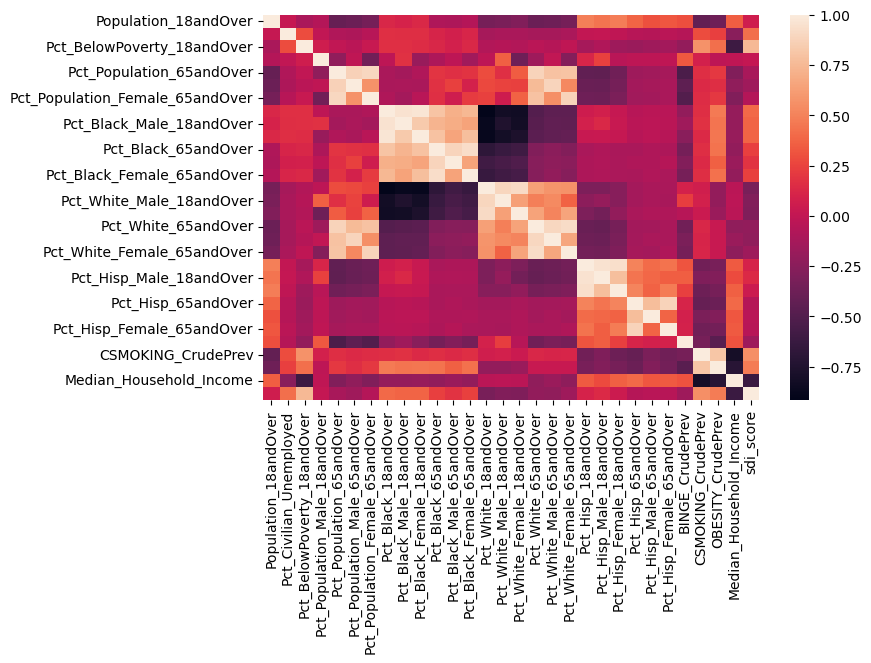

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(X.corr())

In [85]:
corr_matrix = X.corr().abs() 

In [86]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [87]:
to_drop = [column for column in upper.columns if any(upper[column] >= 0.75)]

In [88]:
print("Highly correlated features to drop:")
print(to_drop)

# STEP 5: Drop the highly correlated features
X_filtered = X.drop(columns=to_drop)

# Optional: Confirm number of remaining features
print("Remaining features after dropping highly correlated ones:", X_filtered.shape[1])


Highly correlated features to drop:
['Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver', 'Pct_Black_Male_18andOver', 'Pct_Black_Female_18andOver', 'Pct_Black_65andOver', 'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver', 'Pct_White_18andOver', 'Pct_White_Male_18andOver', 'Pct_White_Female_18andOver', 'Pct_White_65andOver', 'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver', 'Pct_Hisp_Male_18andOver', 'Pct_Hisp_Female_18andOver', 'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver', 'OBESITY_CrudePrev', 'Median_Household_Income', 'sdi_score']
Remaining features after dropping highly correlated ones: 10


In [89]:
X_filtered 

,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Black_18andOver,Pct_Hisp_18andOver,Pct_Hisp_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev
0,13996,2.3,1.907688,48.342384,9.024007,11.138897,7.945127,0.371535,17.1,11.9
1,4091,4.6,12.441946,49.278905,26.766072,3.299927,2.395502,0.000000,17.7,17.8
2,29499,4.5,9.415209,49.808468,8.959626,16.742940,34.801180,0.918675,17.4,18.3
3,36041,5.6,7.276174,51.022447,12.299881,14.608363,29.172332,1.048806,17.8,17.9
4,26293,5.6,8.663903,51.306431,11.569619,9.629940,32.750162,0.981250,17.3,18.6
...,...,...,...,...,...,...,...,...,...,...
891,710,5.9,26.901408,54.366197,19.154930,0.000000,0.000000,0.000000,14.3,29.6
892,2351,8.4,20.799660,50.999575,13.100808,0.000000,0.765632,0.000000,14.7,29.2
893,4316,6.7,12.025316,49.606117,26.459685,4.147359,0.278035,0.000000,14.7,22.3
894,2356,2.9,23.047538,53.098472,29.668930,0.000000,0.509338,0.000000,13.8,30.1



## Features

We exclude variables whose values can cover the values of the other variables



Subset variables are considered


It means that, for instance, instead of considering the entire population, we account for differences based on gender


What about the other way around?



Variables that may be included in the modelling 



* Pct_BelowPoverty_18andOver



* sdi_score



* Pct_White_Male_65andOver



* Pct_White_Female_65andOver



* Pct_Black_Female_65andOver



* Pct_Black_Male_65andOver



* Pct_Hisp_Male_65andOver



* Pct_Hisp_Female_65andOver



* OBESITY_CrudePrev



* CSMOKING_CrudePrev



* Pct_Civilian_Unemployed



* BINGE_CrudePrev



* Median_Household_Income



* ZCTA_pm2_5






## Feature engineering or creation 



* Pct_White_Male_18andUnder65 = Pct_White_Male_18andOver - Pct_White_Male_65andOver



* Pct_White_Female_18andUnder65 = Pct_White_Female_18andOver - Pct_White_Female_65andOver



* Pct_Black_Female_18andUnder65 = Pct_Black_Female_18andOver - Pct_Black_Female_65andOver



* Pct_Black_Male_18andUnder65 = Pct_Black_Male_18andOver - Pct_Black_Male_65andOver



* Pct_Hisp_Male_18andUnder65 = Pct_Hisp_Male_18andOver - Pct_Hisp_Male_65andOver



* Pct_Hisp_Female_18andUnder65 = Pct_Hisp_Female_18andOver - Pct_Hisp_Female_65andOver




In [103]:


xdata.head()



,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,Pct_Black_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
0,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,5.244356,5.894541,0.685910,...,22.5,153314.0,7.801598,1.0,24.242641,24.607031,5.487282,4.965704,3.801086,3.772506
1,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,1.686629,1.613297,0.562210,...,32.2,82500.0,7.171176,18.0,32.437057,34.685896,1.613297,1.124419,0.024444,2.371058
2,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,7.993491,8.749449,1.247500,...,36.6,70629.0,7.940322,72.0,27.329740,25.495780,7.922302,7.573138,17.732805,16.149700
3,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,8.135179,6.473183,1.459449,...,31.7,81042.0,8.013779,50.0,29.014178,28.844927,5.651896,7.497017,14.896923,13.226603
4,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,5.339824,4.290115,1.361579,...,33.8,88207.0,8.080360,56.0,31.129959,29.057164,3.822310,4.446050,17.616856,14.152056


In [104]:
xdata.columns


Index(['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_18andOver', 'Pct_White_Male_18andOver',
       'Pct_White_Female_18andOver', 'Pct_White_65andOver',
       'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score',
       'Pct_White_Male_Between18and65', 'Pct_White_Female_Between18and65',
       'Pct_Black_Female_Between18and65', 'Pc

In [105]:


xdata["Pct_White_Male_Between18and65"] = xdata["Pct_White_Male_18andOver"] - xdata["Pct_White_Male_65andOver"]



xdata["Pct_White_Female_Between18and65"] = xdata["Pct_White_Female_18andOver"] - xdata["Pct_White_Female_65andOver"]



xdata["Pct_Black_Female_Between18and65"] = xdata["Pct_Black_Female_18andOver"] - xdata["Pct_Black_Female_65andOver"]



xdata["Pct_Black_Male_Between18and65"] = xdata["Pct_Black_Male_18andOver"] - xdata["Pct_Black_Male_65andOver"]



xdata["Pct_Hisp_Male_Between18and65"] = xdata["Pct_Hisp_Male_18andOver"] - xdata["Pct_Hisp_Male_65andOver"]




xdata["Pct_Hisp_Female_Between18and65"] = xdata["Pct_Hisp_Female_18andOver"] - xdata["Pct_Hisp_Female_65andOver"]





In [106]:
z = xdata>=0


pd.DataFrame({"All are positive":   z.sum()})
    
    

,All are positive
Pct_Civilian_Unemployed,788
Pct_BelowPoverty_18andOver,788
Pct_Population_Male_18andOver,788
Pct_Population_65andOver,788
Pct_Population_Male_65andOver,788
Pct_Population_Female_65andOver,788
Pct_Black_18andOver,788
Pct_Black_Male_18andOver,788
Pct_Black_Female_18andOver,788
Pct_Black_65andOver,788


In [107]:
xdata.columns

Index(['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_18andOver', 'Pct_White_Male_18andOver',
       'Pct_White_Female_18andOver', 'Pct_White_65andOver',
       'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score',
       'Pct_White_Male_Between18and65', 'Pct_White_Female_Between18and65',
       'Pct_Black_Female_Between18and65', 'Pc

In [108]:
## Summary of the features included in the modelling

xcol = ['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_65andOver','Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_65andOver','Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_65andOver', 'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score','Pct_White_Male_Between18and65', 
       'Pct_White_Female_Between18and65',
       'Pct_Black_Female_Between18and65', 'Pct_Black_Male_Between18and65',
       'Pct_Hisp_Male_Between18and65', 'Pct_Hisp_Female_Between18and65']



In [109]:


x = xdata[xcol]


x

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
0,2.3,1.907688,4.801372,4.222635,0.685910,0.278651,0.407259,4.779937,2.657902,2.122035,...,22.5,153314.0,7.801598,1.0,24.242641,24.607031,5.487282,4.965704,3.801086,3.772506
1,4.6,12.441946,13.664141,13.101931,0.562210,0.562210,0.000000,25.054999,12.784160,12.270838,...,32.2,82500.0,7.171176,18.0,32.437057,34.685896,1.613297,1.124419,0.024444,2.371058
2,4.5,9.415209,3.328926,5.630699,1.247500,0.420353,0.827147,5.800197,2.108546,3.691651,...,36.6,70629.0,7.940322,72.0,27.329740,25.495780,7.922302,7.573138,17.732805,16.149700
3,5.6,7.276174,5.479870,6.820011,1.459449,0.638162,0.821287,9.725035,4.242391,5.482645,...,31.7,81042.0,8.013779,50.0,29.014178,28.844927,5.651896,7.497017,14.896923,13.226603
4,5.6,8.663903,5.480546,6.089073,1.361579,0.893774,0.467805,8.739969,3.966835,4.773134,...,33.8,88207.0,8.080360,56.0,31.129959,29.057164,3.822310,4.446050,17.616856,14.152056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5.9,26.901408,11.267606,7.887324,0.000000,0.000000,0.000000,19.154930,11.267606,7.887324,...,35.9,25625.0,8.217162,60.0,43.098592,37.746479,0.000000,0.000000,0.000000,0.000000
892,8.4,20.799660,7.230966,5.869843,0.000000,0.000000,0.000000,13.100808,7.230966,5.869843,...,36.7,41318.0,8.007121,52.0,43.002977,43.130583,0.000000,0.000000,0.765632,0.000000
893,6.7,12.025316,11.329935,15.129750,0.417053,0.185357,0.231696,25.857275,11.144578,14.712697,...,38.7,47820.0,7.577166,54.0,34.291010,32.924004,0.741427,2.988879,0.278035,0.000000
894,2.9,23.047538,13.412564,16.256367,0.000000,0.000000,0.000000,29.668930,13.412564,16.256367,...,36.6,34668.0,8.219753,45.0,39.176570,30.645161,0.000000,0.000000,0.509338,0.000000


In [110]:
x.shape

(788, 25)


## Feature transformation

The aim of the work is to model the lung cancer positive cases using features


The columns in the data are very heterogeneous with different scales, possibly very unevenly distributed


To fit the proposed model to the data,  it is necessary to perform standard feature transformations




In [111]:




Percent2DecimalTransformer = make_pipeline(FunctionTransformer(lambda X: X / 100, validate = True))



StandardScaleTransformer = make_pipeline(StandardScaler())



Feature_preprocessing = ColumnTransformer([
    
    
    
    
        ("PercentToDecimal", Percent2DecimalTransformer, ["Pct_Civilian_Unemployed", 
                            "Pct_BelowPoverty_18andOver",
                            "Pct_Population_Male_65andOver", "Pct_Population_Female_65andOver",
                            "Pct_Black_65andOver","Pct_Black_Male_65andOver", 'Pct_Black_Female_65andOver',
                            "Pct_White_65andOver","Pct_White_Male_65andOver", "Pct_White_Female_65andOver",
                            "Pct_Hisp_65andOver", "Pct_Hisp_Male_65andOver", "Pct_Hisp_Female_65andOver",
                            "Pct_White_Male_Between18and65", "Pct_White_Female_Between18and65",
                            "Pct_Black_Female_Between18and65", "Pct_Black_Male_Between18and65",
                            "Pct_Hisp_Male_Between18and65", "Pct_Hisp_Female_Between18and65"]),
        
    
    
        ("StandardScaleTransformer",StandardScaleTransformer, ["BINGE_CrudePrev", "CSMOKING_CrudePrev", 
                                                       
                                                       "OBESITY_CrudePrev",
                                                       "Median_Household_Income", "ZCTA_pm2_5", "sdi_score"])])





In [112]:
Feature_preprocessing

ColumnTransformer(transformers=[('PercentToDecimal',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x1533c1c60>,
                                                                      validate=True))]),
                                 ['Pct_Civilian_Unemployed',
                                  'Pct_BelowPoverty_18andOver',
                                  'Pct_Population_Male_65andOver',
                                  'Pct_Population_Female_65andOver',
                                  'Pct_Black_65andOver',
                                  'Pct_Black_Male_65andOver',
                                  'Pct_Black_Fe...
                                  'Pct_White_Female_Between18and65',
                                  'Pct_Black_Female_Between18and65',
                                  'Pct_Black_Male_Between18and65',
                                  'Pct_Hisp_Male_Between18and65',
                                  'Pct_Hisp_Female_Between18and65']),
                                ('StandardScaleTransformer',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['BINGE_CrudePrev', 'CSMOKING_CrudePrev',
                                  'OBESITY_CrudePrev',
                                  'Median_Household_Income', 'ZCTA_pm2_5',
                                  'sdi_score'])])

In [113]:
N

0      13996
1       4091
2      29499
3      36041
4      26293
       ...  
891      710
892     2351
893     4316
894     2356
895      268
Name: Population_18andOver, Length: 788, dtype: int64

In [114]:



x_train, x_test, y_train, y_test, N_train, N_test = train_test_split(x, y, N, test_size = 0.3, random_state = 42)




In [115]:
x_train.head()

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
670,5.6,28.135629,7.637306,9.031088,1.150259,0.575130,0.575130,15.409326,6.968912,8.440415,...,30.6,48411.0,7.508014,59.0,37.580311,38.015544,3.207254,1.575130,0.642487,0.554404
623,0.0,8.541973,14.138439,10.898380,0.000000,0.000000,0.000000,25.036819,14.138439,10.898380,...,30.6,72563.0,7.392398,17.0,40.206186,27.540501,0.000000,0.000000,0.000000,0.000000
27,3.0,2.527292,8.439154,10.954978,1.281796,0.569245,0.712551,14.943673,6.544325,8.399347,...,31.0,131184.0,7.833080,2.0,27.427252,26.834123,5.815851,4.553959,4.557940,4.868437
152,7.1,8.501027,12.689938,11.457906,5.174538,2.505133,2.669405,18.973306,10.184805,8.788501,...,33.3,44115.0,7.504450,38.0,24.845996,31.909651,5.420945,11.334702,1.765914,0.739220
307,0.0,2.526003,24.665676,20.802377,0.000000,0.000000,0.000000,41.753343,24.665676,17.087667,...,29.8,58261.0,7.120594,4.0,22.288262,21.545319,9.361070,0.000000,0.000000,0.000000


In [116]:
x_test.head()

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
651,5.4,9.920635,17.619048,16.428571,0.000000,0.000000,0.000000,34.047619,17.619048,16.428571,...,36.2,34914.0,7.479898,33.0,31.984127,33.809524,0.000000,0.000000,0.000000,0.000000
42,2.6,9.323803,8.056185,10.833963,0.730663,0.327538,0.403124,15.847821,6.689342,9.158478,...,22.8,106929.0,8.324991,40.0,29.232804,29.617032,4.213908,4.106828,5.120937,4.976064
234,3.3,5.862458,8.117249,10.372041,0.000000,0.000000,0.000000,18.489290,8.117249,10.372041,...,34.2,72328.0,7.159498,6.0,39.571590,41.939121,0.000000,0.000000,0.000000,0.000000
221,3.8,15.130193,7.659630,10.091465,0.866964,0.377129,0.489835,16.641380,7.135116,9.506264,...,32.2,47684.0,7.182274,76.0,32.454809,35.441502,2.800295,3.138411,8.947072,8.409554
260,2.7,10.481414,12.065814,10.725168,14.929921,7.434491,7.495430,7.861060,4.631322,3.229738,...,35.5,51618.0,7.301255,43.0,20.962828,21.633151,19.987812,14.137721,3.046923,1.340646


In [117]:
y_train.head()

670    74.0
623     7.0
27     72.0
152    17.0
307     5.0
Name: case_n_18plus, dtype: float64

In [118]:
y_test.head()

651     9.0
42     33.0
234     6.0
221    93.0
260     6.0
Name: case_n_18plus, dtype: float64

In [119]:
N_train.head()

670    19300
623      679
27     25121
152     2435
307      673
Name: Population_18andOver, dtype: int64

In [120]:
N_test.head()

651     1260
42     15876
234      887
221    23069
260     1641
Name: Population_18andOver, dtype: int64

In [121]:


print("Train data")


print(y_train.shape)


print(x_train.shape)


print(N_train.shape)



print("Test data")


print(y_test.shape)


print(x_test.shape)


print(N_test.shape)




Train data
(551,)
(551, 25)
(551,)
Test data
(237,)
(237, 25)
(237,)



##  XGBoost Poisson model



In [ ]:

## Define XGBoost-based Poisson regression pipeline



## max_depth -- Tree depth 3 to 10 --- Lower for small data, higher for large data



## Learning_rate -- Step size for updates 0.01 to 0.3 --- Lower values need more trees



## n_estimators -- Number of trees 100 to 1000 --- More trees help with low learning rates



poisson_xgb = Pipeline([("preprocessor", Feature_preprocessing),
                        
                        
                        
    ("regressor", XGBRegressor(objective="count:poisson", max_depth = 6, learning_rate = 0.1, n_estimators=100))])








# Define parameters



params = {"objective": "count:poisson",  # Poisson regression
          
          
          
          "eval_metric": "poisson-nloglik",  # Negative log-likelihood for Poisson
          
          
          
          "learning_rate": 0.1,
          
          
          
          "max_depth": 3,
          
          
          
         "lambda": 1.0  # L2 regularization
          
                 
         }










 # Train model
    
    
    
poisson_xgb.fit(x_train, y_train)  # Train the pipeline
    
    
    
y_pred = poisson_xgb.predict(x_test)  # Predict normally






In [86]:
y_pred

array([  7.590232 ,  52.01815  ,   8.27081  ,  79.791954 ,  13.631049 ,
       104.09875  ,  10.777783 , 131.73366  ,  15.4412565,  52.263992 ,
         5.085667 ,  16.286703 ,  19.159023 ,  11.208244 ,  21.88275  ,
        44.277424 ,  33.3581   ,  19.360851 , 113.6955   ,  13.04589  ,
       113.71003  ,  81.657646 ,  11.830864 ,  28.659445 ,  22.64587  ,
        29.010668 ,  14.77417  ,   6.0120564,   6.548296 ,  22.433056 ,
         7.1444736,  35.598763 ,   9.314118 ,  84.90804  ,  41.138256 ,
         6.8609185,   6.9689555,   6.2513776,   9.197101 ,  13.225161 ,
        11.195988 ,  22.069784 ,  51.5878   ,  12.6874   ,  40.18343  ,
         7.5965757,  72.711494 ,   8.301154 ,   4.086849 ,  42.987106 ,
        12.342265 ,   7.95013  ,   6.009666 ,  56.237453 ,  27.881073 ,
         4.2835045,   5.507873 ,  67.22428  ,   6.3154664,  30.628057 ,
        18.854855 ,   8.301878 ,  50.876503 ,   4.185866 ,  53.93595  ,
        26.766844 ,   4.585818 ,   7.7195053,  67.16052  ,  28.6

In [87]:
y_test

651      9.0
42      33.0
234      6.0
221     93.0
260      6.0
       ...  
271     11.0
396    120.0
609      2.0
252     58.0
235     73.0
Name: case_n_18plus, Length: 237, dtype: float64

In [88]:


mae = mean_absolute_error(y_test, y_pred)



mae


print(f"Mean Absolute Error: {mae}")




Mean Absolute Error: 15.174339695821834


Text(0, 0.5, 'Predicted values')

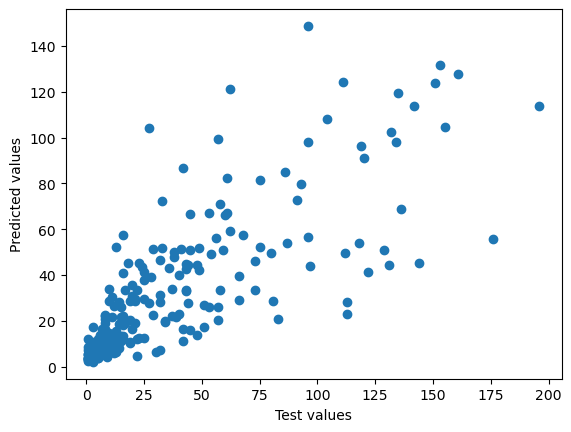

In [89]:

plt.scatter(y_test, y_pred)


plt.xlabel("Test values")


plt.ylabel("Predicted values")




## Feature importance



Feature importance is based on the number of times a feature is used in a split 




In [91]:


# Assuming poisson_xgb is your pipeline and is already trained



# Access the XGBRegressor model from the pipeline using 'named_steps'


# Access the trained model


regressor_model = poisson_xgb.named_steps['regressor']



# Set feature names (necessary if X is a DataFrame)



regressor_model.get_booster().feature_names = list(X.columns)




# Plot importance



xgb.plot_importance(regressor_model, importance_type="weight")



plt.show()




# Extract importance as a DataFrame



importance_df = pd.DataFrame(
    
    
    regressor_model.get_booster().get_score(importance_type="weight").items(),
    
    
    
    
    columns=["Feature", "Importance"]
    
    
    
)



print(importance_df)




NameError: name 'X' is not defined



## Gradient Boosting Regression Trees for Poisson regression




A non-linear model, namely Gradient Boosting Regression Trees


Gradient Boosting also gives the possibility to fit the trees with a Poisson loss


It uses an implicit log-link function instead of the default least-squares loss



Here we only fit trees with the Poisson loss 




In [92]:


poisson_gbrt = Pipeline([("preprocessor", Feature_preprocessing),
                        
                        
                        
    ("regressor", HistGradientBoostingRegressor(loss="poisson"))])





Let’s evalute the performance of  the model with  3 different regression metrics

In [93]:



def scoreEstimator(estimator, x_test,  y_test):
    
    
    
    """Score an estimator on the test set"""
    
    
    
    y_pred = estimator.predict(x_test)
    
    

    print("MSE: %.3f" %
          
          
          mean_squared_error(y_test, y_pred))
    
    
    print("MAE: %.3f" %
          
          
          mean_absolute_error(y_test, y_pred))
    
    

    # Ignore non-positive predictions, as they are invalid for
    
    
    # the Poisson deviance
    
    
    mask = y_pred > 0
    
    
    
    if (~mask).any():
        
        
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        
        
        
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")
        
        

    print("mean Poisson deviance: %.3f" %
          
          
          mean_poisson_deviance(y_test[mask],
                                
                                
                                y_pred[mask]))



In [94]:
x_train

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
670,5.6,28.135629,7.637306,9.031088,1.150259,0.575130,0.575130,15.409326,6.968912,8.440415,...,30.6,48411.0,7.508014,59.0,37.580311,38.015544,3.207254,1.575130,0.642487,0.554404
623,0.0,8.541973,14.138439,10.898380,0.000000,0.000000,0.000000,25.036819,14.138439,10.898380,...,30.6,72563.0,7.392398,17.0,40.206186,27.540501,0.000000,0.000000,0.000000,0.000000
27,3.0,2.527292,8.439154,10.954978,1.281796,0.569245,0.712551,14.943673,6.544325,8.399347,...,31.0,131184.0,7.833080,2.0,27.427252,26.834123,5.815851,4.553959,4.557940,4.868437
152,7.1,8.501027,12.689938,11.457906,5.174538,2.505133,2.669405,18.973306,10.184805,8.788501,...,33.3,44115.0,7.504450,38.0,24.845996,31.909651,5.420945,11.334702,1.765914,0.739220
307,0.0,2.526003,24.665676,20.802377,0.000000,0.000000,0.000000,41.753343,24.665676,17.087667,...,29.8,58261.0,7.120594,4.0,22.288262,21.545319,9.361070,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2.8,3.944914,7.675848,9.360255,0.592560,0.230440,0.362120,13.557555,6.457808,7.099748,...,20.7,147324.0,8.414932,12.0,29.929771,28.953144,1.338747,1.223527,3.791287,3.588280
113,4.3,10.004407,9.946424,8.455625,6.778477,4.122991,2.655486,11.320755,5.730259,5.590496,...,38.0,53240.0,7.642221,48.0,36.384812,13.929653,9.154437,16.142558,9.364081,1.374330
301,6.2,13.123561,7.674597,10.897928,0.383730,0.153492,0.230238,16.577130,7.521105,9.056025,...,37.4,70268.0,7.497583,70.0,24.558711,26.784344,18.035303,10.130468,1.227936,0.153492
502,9.2,19.763153,6.480674,10.045529,7.739998,2.518648,5.221350,8.166231,3.903904,4.262327,...,37.5,48353.0,7.322830,83.0,16.681197,19.907004,21.263199,19.897317,2.557396,3.293616


In [95]:
y_train

670    74.0
623     7.0
27     72.0
152    17.0
307     5.0
       ... 
76     40.0
113    26.0
301     9.0
502    54.0
109    97.0
Name: case_n_18plus, Length: 551, dtype: float64

In [96]:


poisson_gbrt.fit(x_train, y_train)






Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('PercentToDecimal',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x1533c1080>,
                                                                                       validate=True))]),
                                                  ['Pct_Civilian_Unemployed',
                                                   'Pct_BelowPoverty_18andOver',
                                                   'Pct_Population_Male_65andOver',
                                                   'Pct_Population_Female_65andOver',
                                                   'Pct_Black_65andOver',
                                                   'Pct_Bla...
                                                   'Pct_Black_Male_Between18and65',
                                                   'Pct_Hisp_Male_Between18and65',
                                                   'Pct_Hisp_Female_Between18and65']),
                                                 ('StandardScaleTransformer',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BINGE_CrudePrev',
                                                   'CSMOKING_CrudePrev',
                                                   'OBESITY_CrudePrev',
                                                   'Median_Household_Income',
                                                   'ZCTA_pm2_5',
                                                   'sdi_score'])])),
                ('regressor', HistGradientBoostingRegressor(loss='poisson'))])

In [97]:
print("Poisson Gradient Boosted Trees evaluation:")



scoreEstimator(poisson_gbrt, x_test,  y_test)


Poisson Gradient Boosted Trees evaluation:
MSE: 648.868
MAE: 15.769
mean Poisson deviance: 12.264




Histogram of observed target values with that of predicted values



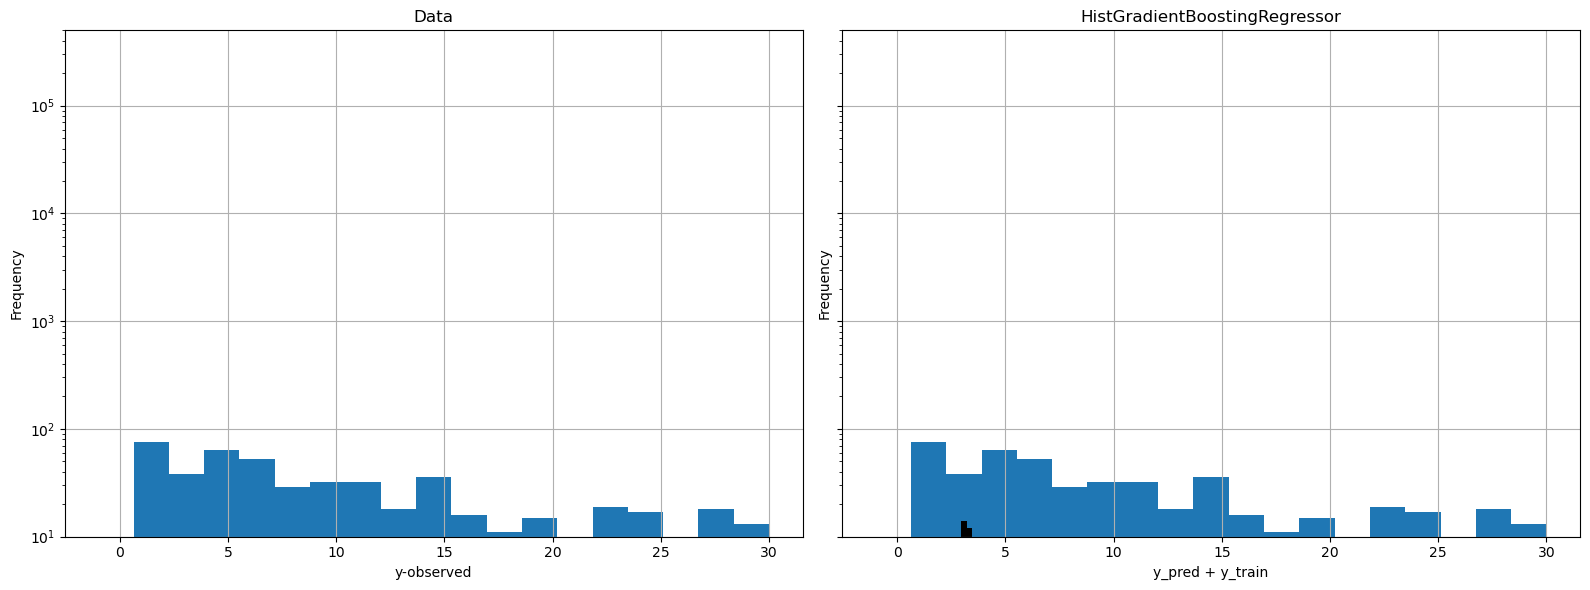

In [98]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey = True)


fig.subplots_adjust(bottom=0.2)


n_bins = 20


for row_idx, df, label in zip(range(2),[x_train, y_test], ["train", "test"]):
    
    
    
    y.hist(bins=np.linspace(-1, 30, n_bins),ax = axes[row_idx])
    
    

    axes[row_idx].set_title("Data")
    
    
    
    axes[row_idx].set_yscale('log')
    
    

    axes[row_idx].set_xlabel("y-observed")
    
    
    
    axes[row_idx].set_ylim([1e1, 5e5])
    
    
    axes[row_idx].set_ylabel("Frequency")
    
    
    
    for idx, model in enumerate([poisson_gbrt]):
        
        
        
        if label != "test":
            
            y_pred = model.predict(df)
        
        
        
        pd.Series(y_pred).hist(bins=np.linspace(-1, 4, n_bins), color = 'k', ax = axes[idx+1])
        
        
        
        axes[idx+1].set(title = model[-1].__class__.__name__, yscale = 'log', xlabel = "y_pred + y_train")
        
        
        
plt.tight_layout()



In [99]:



poissoncustom_xgb = Pipeline([("preprocessor", Feature_preprocessing),
                        
                        
                        
    ("regressor", XGBRegressor(objective="count:poisson", max_depth = 6, learning_rate = 0.1, n_estimators=100))])






In [728]:
poissoncustom_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('PercentToDecimal',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x317205ee0>,
                                                                                       validate=True))]),
                                                  ['Pct_Civilian_Unemployed',
                                                   'Pct_BelowPoverty_18andOver',
                                                   'Pct_Population_Male_65andOver',
                                                   'Pct_Population_Female_65andOver',
                                                   'Pct_Black_65andOver',
                                                   'Pct_Bla...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])


## XGBoost Poisson Regression: Mathematical Formulation


Let $Y_{i}$ denote the observed count over region $A_{i}$ with rate $\lambda_{i}$. In our case, $A_{i}$ refers to the total population. We assume:

\begin{align}
 Y_{i} \sim Poisson(A_{i}\lambda_{i})
\end{align}


The Poisson probability mass function is given by:
\begin{align}
 P(Y_{i} = y_{i}) = \frac{e^{-A_{i}\lambda_{i}} (A_{i}\lambda_{i})^{y_{i}}}{y_{i}!}
\end{align}
We model the rate $\lambda_{i}$ using tree at $t$ - iteration:

\begin{align}
\log(\lambda_{i}) = f(\mathbf{x}_{i}, \beta_{t})
\end{align}

The log-likelihood function for N observations is:

\begin{align}
\ell(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}) = \sum_{i = 1}^{n}{(y_{i} \log(A_{i}\lambda_{i}) -  A_{i}\lambda_{i} - \log(y_{i}!))}
\end{align}


Substituting $\lambda_{i} = e^{f(\mathbf{x}_{i}, \;\beta_{t})}$ and ignoring constants, we have:
\begin{align}
\ell(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t}) &= \sum_{i = 1}^{n}{(y_{i} \log(A_{i}\lambda_{i}) -  A_{i}\lambda_{i} - \log(y_{i}!))}\\
&\approx \sum_{i = 1}^{n}{(y_{i} \log(A_{i}\lambda_{i}) -  A_{i}\lambda_{i} - \log(y_{i}!))}\\
&\approx \sum_{i = 1}^{n}{(y_{i} f(\mathbf{x}_{i},\; \beta_{t}) -  A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}})
\end{align}

In XGBoost Poisson Loss function, we minimize the objective function given by 

\begin{align}
L(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t}) = -\ell(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t})
\end{align}
That is,

\begin{align}
L(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t}) =  \sum_{i = 1}^{n}{(A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}}- y_{i} f(\mathbf{x}_{i},\; \beta_{t}))
\end{align}

Next, we derive gradients:

Gradient: 

\begin{align}
\frac{dL}{df(\mathbf{x}_{i},\; \beta_{t})} = \sum_{i = 1}^{n}{(A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}}- y_{i})
\end{align}


Hessian: 

\begin{align}
\frac{d^{2}L}{df(\mathbf{x}_{i},\; \beta_{t})^{2}} = \sum_{i = 1}^{n}{A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}}
\end{align}


These are used in XGBoost’s custom objective function for efficient optimization




## Poisson Deviance

 
The deviance compares the fitted model to the saturated model  

\begin{align}
D = 2 (\ell(\text{saturated}) - \ell(\hat{\lambda}))
\end{align}


* Log-Likelihood of the Fitted Model


\begin{align}
\ell(\hat{\lambda}) = \sum_{i=1}^{n} \left(y_i \log(A_i \hat{\lambda_i}) - A_i \hat{\lambda_i} - \log(y_i!) \right)
\end{align}

* Step 2: Log-Likelihood of the Saturated Model


\begin{align}
\ell(\text{saturated}) = \sum_{i=1}^{n} \left( y_i \log(y_i) - y_i - \log(y_i!) \right)
\end{align}

* Step 3: Deviance Calculation
Substitute the log-likelihoods into the deviance expression:
\begin{align}
D = 2 \sum_{i=1}^{n} \left( y_i \log\left(\frac{y_i}{A_i \hat{\lambda_i}}\right) - (y_i - A_i \hat{\lambda_i}) \right)
\end{align}

* Step 4: Final Poisson Deviance Formula Using $ A_{i} \lambda_i$  

\begin{align}
D = 2 \sum_{i=1}^{n} \left( y_i \log\left(\frac{y_i}{A_i \hat{\lambda_i}}\right) - (y_i - A_i \hat{\lambda_i}) \right)
\end{align}

* Interpretation  


This formulation penalizes deviations from observed values based on the predicted rate per area or population unit


It effectively handles cases where rates vary by region or population.




In [126]:


xtrain = x_train.copy(deep = True)


xtest = x_test.copy(deep = True)



In [127]:
xtrain.head()

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
670,5.6,28.135629,7.637306,9.031088,1.150259,0.575130,0.575130,15.409326,6.968912,8.440415,...,30.6,48411.0,7.508014,59.0,37.580311,38.015544,3.207254,1.575130,0.642487,0.554404
623,0.0,8.541973,14.138439,10.898380,0.000000,0.000000,0.000000,25.036819,14.138439,10.898380,...,30.6,72563.0,7.392398,17.0,40.206186,27.540501,0.000000,0.000000,0.000000,0.000000
27,3.0,2.527292,8.439154,10.954978,1.281796,0.569245,0.712551,14.943673,6.544325,8.399347,...,31.0,131184.0,7.833080,2.0,27.427252,26.834123,5.815851,4.553959,4.557940,4.868437
152,7.1,8.501027,12.689938,11.457906,5.174538,2.505133,2.669405,18.973306,10.184805,8.788501,...,33.3,44115.0,7.504450,38.0,24.845996,31.909651,5.420945,11.334702,1.765914,0.739220
307,0.0,2.526003,24.665676,20.802377,0.000000,0.000000,0.000000,41.753343,24.665676,17.087667,...,29.8,58261.0,7.120594,4.0,22.288262,21.545319,9.361070,0.000000,0.000000,0.000000


In [128]:
xtest.head()

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
651,5.4,9.920635,17.619048,16.428571,0.000000,0.000000,0.000000,34.047619,17.619048,16.428571,...,36.2,34914.0,7.479898,33.0,31.984127,33.809524,0.000000,0.000000,0.000000,0.000000
42,2.6,9.323803,8.056185,10.833963,0.730663,0.327538,0.403124,15.847821,6.689342,9.158478,...,22.8,106929.0,8.324991,40.0,29.232804,29.617032,4.213908,4.106828,5.120937,4.976064
234,3.3,5.862458,8.117249,10.372041,0.000000,0.000000,0.000000,18.489290,8.117249,10.372041,...,34.2,72328.0,7.159498,6.0,39.571590,41.939121,0.000000,0.000000,0.000000,0.000000
221,3.8,15.130193,7.659630,10.091465,0.866964,0.377129,0.489835,16.641380,7.135116,9.506264,...,32.2,47684.0,7.182274,76.0,32.454809,35.441502,2.800295,3.138411,8.947072,8.409554
260,2.7,10.481414,12.065814,10.725168,14.929921,7.434491,7.495430,7.861060,4.631322,3.229738,...,35.5,51618.0,7.301255,43.0,20.962828,21.633151,19.987812,14.137721,3.046923,1.340646


In [129]:


Percent2DecimalTransformer = make_pipeline(FunctionTransformer(lambda X: X / 100, validate = True))



StandardScaleTransformer = make_pipeline(StandardScaler())



Feature_preprocessing = ColumnTransformer([
    
    
    
    
        ("PercentToDecimal", Percent2DecimalTransformer, ["Pct_Civilian_Unemployed", 
                            "Pct_BelowPoverty_18andOver",
                            "Pct_Population_Male_65andOver", "Pct_Population_Female_65andOver",
                            "Pct_Black_65andOver","Pct_Black_Male_65andOver", 'Pct_Black_Female_65andOver',
                            "Pct_White_65andOver","Pct_White_Male_65andOver", "Pct_White_Female_65andOver",
                            "Pct_Hisp_65andOver", "Pct_Hisp_Male_65andOver", "Pct_Hisp_Female_65andOver",
                            "Pct_White_Male_Between18and65", "Pct_White_Female_Between18and65",
                            "Pct_Black_Female_Between18and65", "Pct_Black_Male_Between18and65",
                            "Pct_Hisp_Male_Between18and65", "Pct_Hisp_Female_Between18and65"]),
        
    
    
        ("StandardScaleTransformer",StandardScaleTransformer, ["BINGE_CrudePrev", "CSMOKING_CrudePrev", 
                                                       
                                                       "OBESITY_CrudePrev",
                                                       "Median_Household_Income", "ZCTA_pm2_5", "sdi_score"])])




In [130]:



# Manually apply Percent2DecimalTransformer


percent_columns = ["Pct_Civilian_Unemployed", "Pct_BelowPoverty_18andOver",
    
    
    "Pct_Population_Male_65andOver", "Pct_Population_Female_65andOver",
                   
                   
    "Pct_Black_65andOver", "Pct_Black_Male_65andOver", "Pct_Black_Female_65andOver",
                   
                   
                   
    "Pct_White_65andOver", "Pct_White_Male_65andOver", "Pct_White_Female_65andOver",
                   
                   
                   
    "Pct_Hisp_65andOver", "Pct_Hisp_Male_65andOver", "Pct_Hisp_Female_65andOver",
                   
                   
    "Pct_White_Male_Between18and65", "Pct_White_Female_Between18and65",
                   
                   
                   
    "Pct_Black_Female_Between18and65", "Pct_Black_Male_Between18and65",
                   
                   
                   
    "Pct_Hisp_Male_Between18and65", "Pct_Hisp_Female_Between18and65"
                   
                   
]


xtrain[percent_columns] = xtrain[percent_columns] / 100





# Manually apply StandardScaleTransformer



scale_columns = ["BINGE_CrudePrev", 
                 
                 
                 "CSMOKING_CrudePrev", 
                 
                 
                 
                 "OBESITY_CrudePrev",
                 
                 
                 
                 "Median_Household_Income", 
                 
                 
                 
                 "ZCTA_pm2_5", 
                 
                 
                 
                 "sdi_score"]



scaler = StandardScaler()


# Fit and transform the training data


xtrain[scale_columns] = scaler.fit_transform(xtrain[scale_columns])



# Apply the same transformation to the test data (using the learned parameters)


xtest[scale_columns] = scaler.transform(xtest[scale_columns])




xtest[percent_columns] = xtest[percent_columns] / 100




In [137]:


xtrain.head()



,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
670,0.056,0.281356,0.076373,0.090311,0.011503,0.005751,0.005751,0.154093,0.069689,0.084404,...,-0.696928,-0.510399,-0.197608,0.809299,0.375803,0.380155,0.032073,0.015751,0.006425,0.005544
623,0.000,0.085420,0.141384,0.108984,0.000000,0.000000,0.000000,0.250368,0.141384,0.108984,...,-0.696928,0.270782,-0.446034,-0.914950,0.402062,0.275405,0.000000,0.000000,0.000000,0.000000
27,0.030,0.025273,0.084392,0.109550,0.012818,0.005692,0.007126,0.149437,0.065443,0.083993,...,-0.614879,2.166840,0.500861,-1.530753,0.274273,0.268341,0.058159,0.045540,0.045579,0.048684
152,0.071,0.085010,0.126899,0.114579,0.051745,0.025051,0.026694,0.189733,0.101848,0.087885,...,-0.143101,-0.649351,-0.205267,-0.052826,0.248460,0.319097,0.054209,0.113347,0.017659,0.007392
307,0.000,0.025260,0.246657,0.208024,0.000000,0.000000,0.000000,0.417533,0.246657,0.170877,...,-0.861025,-0.191807,-1.030060,-1.448646,0.222883,0.215453,0.093611,0.000000,0.000000,0.000000


In [140]:

xtest.head()


,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
651,0.054,0.099206,0.176190,0.164286,0.000000,0.000000,0.000000,0.340476,0.176190,0.164286,...,0.451750,-0.946951,-0.258023,-0.258093,0.319841,0.338095,0.000000,0.000000,0.000000,0.000000
42,0.026,0.093238,0.080562,0.108340,0.007307,0.003275,0.004031,0.158478,0.066893,0.091585,...,-2.296872,1.382328,1.557832,0.029281,0.292328,0.296170,0.042139,0.041068,0.051209,0.049761
234,0.033,0.058625,0.081172,0.103720,0.000000,0.000000,0.000000,0.184893,0.081172,0.103720,...,0.041508,0.263181,-0.946466,-1.366539,0.395716,0.419391,0.000000,0.000000,0.000000,0.000000
221,0.038,0.151302,0.076596,0.100915,0.008670,0.003771,0.004898,0.166414,0.071351,0.095063,...,-0.368734,-0.533914,-0.897528,1.507209,0.324548,0.354415,0.028003,0.031384,0.089471,0.084096
260,0.027,0.104814,0.120658,0.107252,0.149299,0.074345,0.074954,0.078611,0.046313,0.032297,...,0.308166,-0.406671,-0.641872,0.152442,0.209628,0.216332,0.199878,0.141377,0.030469,0.013406


In [142]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [146]:

X = xtrain



ytrain = ytrain



weight = N_train



NameError: name 'ytrain' is not defined


Let:

- \( y_i \): observed count  
- \( \eta_i \): predicted log-rate (i.e., `preds`)  
- \( \hat{\lambda}_i = \exp(\eta_i) \): predicted Poisson rate  
- \( A_i \): exposure (e.g., population or time)

The **Poisson deviance** is defined as:

$$
D_{\text{Poisson}} = 2 \sum_{i=1}^{n} \left[
y_i \log \left( \frac{y_i}{\hat{\lambda}_i A_i} \right) - (y_i - \hat{\lambda}_i A_i)
\right]
$$

with the convention that:

$$
y_i \log \left( \frac{y_i}{\hat{\lambda}_i A_i} \right) = 0 \quad \text{if } y_i = 0
$$

The **L2 regularization** term is:

$$
\text{Reg}_{\ell_2} = \lambda \sum_{i=1}^{n} \eta_i^2
$$

So the **total loss** becomes:

$$
\text{Loss} = D_{\text{Poisson}} + \text{Reg}_{\ell_2}
$$


In [150]:


ytrain = ytrain



X = xtrain



weight = N_train



# Custom objective for Poisson regression



# Ensures the model optimizes for Poisson regression



def poisson_objective(preds, dtrain):
    y_true = dtrain.get_label()
    A_i = dtrain.get_float_info('weight')  
    preds = np.exp(preds)
    grad = A_i * preds - y_true
    hess = A_i * preds
    return grad, hess


#  checks performance using the Poisson deviance

def poisson_deviance(preds, dtrain, reg_lambda=0.0):
    
    
    y_true = dtrain.get_label()
    
    
    A_i = dtrain.get_float_info('weight')  

    rate_pred = np.exp(preds)

    # Poisson deviance
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = np.where(y_true > 0, y_true * np.log(y_true / (rate_pred * A_i)), 0.0)
        term2 = y_true - rate_pred * A_i
        deviance = 2 * np.sum(term1 - term2)

    # L2 regularization on predicted log-rates (not on exp(preds))
    reg_term = reg_lambda * np.sum(preds ** 2)

    return 'poisson_deviance_reg', deviance + reg_term
    
    
    # preds = np.exp(preds)
    
    
    # deviance = 2 * np.sum(y_true * np.log((y_true) / (preds* A_i)) - (y_true - preds* A_i))
    
    
    # return 'poisson_deviance', deviance


def make_poisson_feval(reg_lambda=0.0):
    return lambda preds, dtrain: poisson_deviance(preds, dtrain, reg_lambda=reg_lambda)


dtrain = xgb.DMatrix(X, label = ytrain, weight = weight)



params = {
    
    
    'objective': 'reg:squarederror', 
    
    
    'eval_metric': 'rmse', 
    
    
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    obj=poisson_objective,
    feval=make_poisson_deviance(reg_lambda=1.0),  # or 0.0 if no regularization
    evals=[(dtrain, 'train')],
    verbose_eval=True
)



# model = xgb.train(
    
    
#     params,
    
    
#     dtrain,
    
    
#     num_boost_round = 100,
    
    
    
#     obj = poisson_objective,
    
    
    
#     custom_metric = poisson_deviance)



preds = model.predict(dtest)



poisson_preds = N_test*np.exp(preds)




mae = np.sqrt(mean_squared_error(y_test, poisson_preds))



print(f"MAE: {mae}")



NameError: name 'ytrain' is not defined

In [151]:


dtrain = xgb.DMatrix(X, label = ytrain, weight = weight)



print(dtrain.num_row())



print(dtrain.num_col())



NameError: name 'ytrain' is not defined

In [743]:


X = xtest


dtest = xgb.DMatrix(X, label = y_test, weight = N_test)



In [135]:
poisson_preds

NameError: name 'poisson_preds' is not defined

In [136]:


# Assuming 'model' is a Booster object trained by xgb.train



# Plot feature importance



xgb.plot_importance(model, importance_type="weight")




plt.show()



# Extract feature importance into a DataFrame



importance_df = pd.DataFrame(model.get_score(importance_type="weight").items(),
                             
                             
                             
    columns=["Feature", "Importance"]
                             
                             
                             
)



print(importance_df)




ValueError: tree must be Booster, XGBModel or dict instance